In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

## Feature Selection (Отбор признаков)

In [2]:
data = pd.read_csv('house_prices.csv')
data.head()

,SalePrice,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,GarageCars,Fireplaces,WoodDeckSF,...,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,208500,8450.0,7,196.0,856.0,1710.0,2,2,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,181500,9600.0,6,0.0,1262.0,1262.0,2,2,1,298.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,223500,11250.0,7,162.0,920.0,1786.0,2,2,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,140000,9550.0,7,0.0,756.0,1717.0,1,3,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,250000,14260.0,8,350.0,1145.0,2198.0,2,3,1,192.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(data, test_size=0.2, random_state=42)

y_train = tr.SalePrice
y_test = te.SalePrice
X_train = tr.drop(['SalePrice'], axis=1)
X_test = te.drop(['SalePrice'], axis=1)

### 0. Модель без отбора признаков

Будем хранить результаты разных моделей в словаре. Начнем с простого решающего дерева.

In [4]:
test_results  = {}
train_results = {}
num_features = {}

### Задание

Заполните функцию `fit_model`:
- Обучить дерево решений
- Посчитать RMSE на тестовой и тренировочной выборказ


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

def fit_model(X, y, X_test, y_test):
    # train Decision Tree
    DT_model = DecisionTreeRegressor()
    
    DT_model.fit(X, y)
    
    y_pred_train = DT_model.predict(X=X)
    y_pred_test = DT_model.predict(X=X_test)
    
    res_train = mean_squared_error(y_true=y, y_pred=y_pred_train, squared= False)
    res_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared= False)
    
    # compute RMSE
    print('RMSE train: {:.1f}'.format(res_train))
    print('RMSE test: {:.1f}'.format(res_test))
    
    # plot feature importance
    impartance = pd.DataFrame(data= {'importance': DT_model.feature_importances_},  
                              index= DT_model.feature_names_in_)
    impartance.sort_values('importance').plot.bar()
    
    ## wrong way
#     fig, ax = plt.subplots()
#     idx = np.arange(len(DT_model.feature_importances_))
#     ax.set_xticks(idx, labels= DT_model.feature_names_in_, rotation=90)
#     ax.bar(idx, height=DT_model.feature_importances_, )
#     ax.legend('importance', loc= 'upper left')
#     plt.show()
    
    return res_train, res_test

RMSE train: 246.5
RMSE test: 41017.6


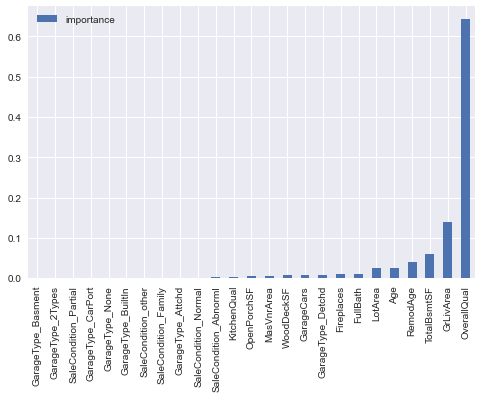

In [6]:
train_results['tree'], test_results['tree'] = fit_model(X_train, y_train, X_test, y_test)
num_features['tree'] = X_train.shape[1]

* Фильтрация (filter methods)

Понижение размерности без учёта модели

* Методы-обёртки (wrapper methods)

Выбор признаков, дающих лучшее качество для модели

* Понижение с помощью моделей (embedded methods)

Использование свойств моделей для оценивания важности признаков

### 1. Фильтрация

Рассмотрим методы фильтрации. `VarianceThreshold`, `SelectKBest` - трансформеры (вспомните `StandardScaler` как пример трансформера). Первый отбирает признаки по дисперсии, второй - по схожести с целевой переменной (нужно задать метрику для измерения схожести).

In [7]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest

#### Задание. 
Отфильтруйте признаки по дисперсии, используя порог 0.1

In [8]:
# initialize filtration
selector_var = VarianceThreshold(threshold=0.1)
X_train_var = selector_var.fit_transform(X_train)

# fit and transform data

print(X_train.shape)
print(X_train_var.shape)

(1168, 25)
(1168, 16)


In [9]:
selector_var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False])

In [10]:
X_train.columns[selector_var.get_support()]

Index(['LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'KitchenQual', 'Age', 'RemodAge', 'SaleCondition_Normal',
       'GarageType_Attchd', 'GarageType_Detchd'],
      dtype='object')

In [11]:
X_train_var = pd.DataFrame(X_train_var, columns=X_train.columns[selector_var.get_support()])

In [12]:
X_test_var = pd.DataFrame(data= selector_var.transform(X_test), 
                          columns= X_test.columns[selector_var.get_support()])

RMSE train: 246.5
RMSE test: 39237.3


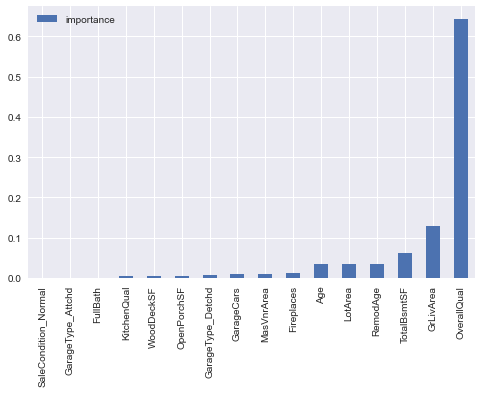

In [13]:
train_results['variance'], test_results['variance'] = fit_model(X_train_var, y_train, X_test_var, y_test)
num_features['variance'] = X_train_var.shape[1]

#### Задание. 
Отфильтруйте признаки используя f-score

In [14]:
?SelectKBest

In [15]:
from sklearn.feature_selection import f_regression

In [16]:
# initialize filtration
selector_k_best = SelectKBest(score_func= f_regression, k= 10)

# fit and transform data
X_train_k_best = selector_k_best.fit_transform(X_train, y_train)
X_test_k_best = selector_k_best.transform(X_test)

print(X_train_k_best.shape)

(1168, 10)


In [17]:
X_train_k_best = pd.DataFrame(X_train_k_best, 
                              columns=X_train.columns[selector_k_best.get_support()])

X_test_k_best = pd.DataFrame(X_test_k_best, 
                              columns=X_test.columns[selector_k_best.get_support()])

RMSE train: 1028.5
RMSE test: 41670.9


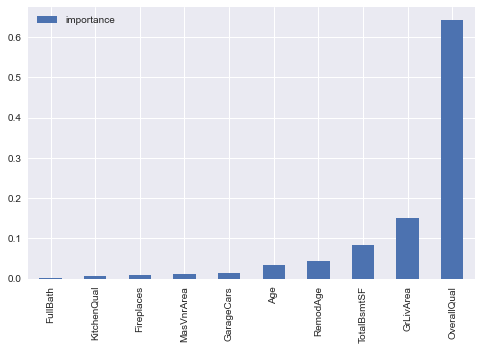

In [18]:
train_results['f_score'], test_results['f_score'] = fit_model(X_train_k_best, y_train, X_test_k_best, y_test)
num_features['f_score'] = X_train_k_best.shape[1]

### 2. Wrapper method: recursive feature elimination

`RFE` - рекурсивно выбирает лучший набор фичей для данной модели.

In [19]:
from sklearn.feature_selection import RFE
# ?RFE

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(estimator=lr)

X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
print(X_train_rfe.shape)

(1168, 12)


In [21]:
X_train_rfe = pd.DataFrame(X_train_rfe, columns=X_train.columns[rfe.get_support()])
X_test_rfe = pd.DataFrame(X_test_rfe, columns=X_test.columns[rfe.get_support()])

RMSE train: 24909.9
RMSE test: 39168.5


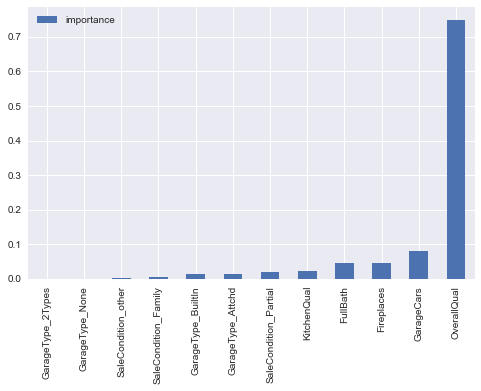

In [22]:
train_results['rfe'], test_results['rfe'] = fit_model(X_train_rfe, y_train, X_test_rfe, y_test)
num_features['rfe'] = X_train_rfe.shape[1]

#### Задание. 
Проделайте то же самое, используя DecisionTreeRegressor в качетсве модели.

In [23]:
dt = DecisionTreeRegressor()
rfe_tree = RFE(estimator= dt)

X_train_rfe_tree = rfe_tree.fit_transform(X_train, y_train)
X_test_rfe_tree = rfe_tree.transform(X_test)

print(X_train_rfe_tree.shape)

(1168, 12)


RMSE train: 284.3
RMSE test: 40893.0


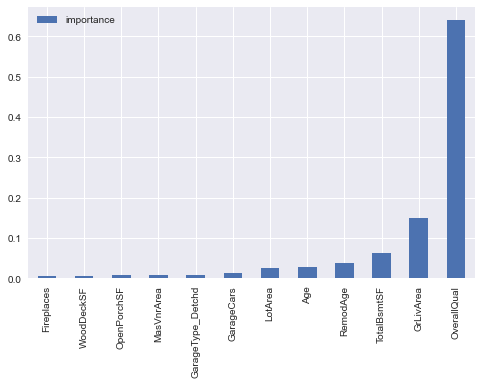

In [24]:
X_train_rfe_tree = pd.DataFrame(data=X_train_rfe_tree, columns=X_train.columns[rfe_tree.get_support()])
X_test_rfe_tree = pd.DataFrame(data=X_test_rfe_tree, columns=X_test.columns[rfe_tree.get_support()])

train_results['rfe_tree'], test_results['rfe_tree'] = fit_model(X_train_rfe_tree, y_train, X_test_rfe_tree, y_test)
num_features['rfe_tree'] = X_train_rfe.shape[1]

 ### 3. Embedded Method: Lasso
 
`SelectFromModel` - transformer, which can be used with any sklearn estimator, which has attribute `coef_` or `feature_importance_`. 

E.g. we can use `Lasso`, since we know it has usefull property of removig irrelevant features

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

model = Lasso(alpha=1000)
selector = SelectFromModel(model)

X_train_lasso = selector.fit_transform(X_train, y_train)
X_test_lasso = selector.transform(X_test)
print(X_train_lasso.shape)

(1168, 13)


In [26]:
X_train_lasso = pd.DataFrame(X_train_lasso, columns=X_train.columns[selector.get_support()])

RMSE train: 284.3
RMSE test: 37351.2


/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


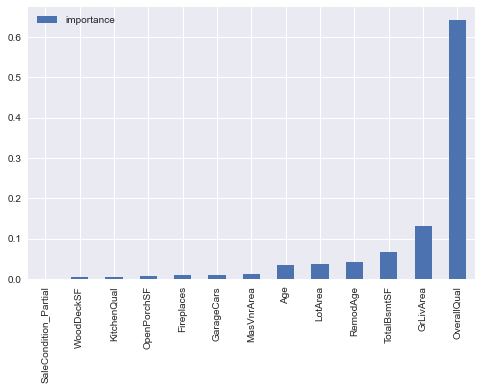

In [27]:
train_results['lasso'], test_results['lasso'] = fit_model(X_train_lasso, y_train, X_test_lasso, y_test)
num_features['lasso'] = X_train_lasso.shape[1]

Попробуем модель поинтереснее. Отберем фичи с помощью RandomForest.

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
selector = SelectFromModel(model)

X_train_rf = selector.fit_transform(X_train, y_train)
X_test_rf = selector.transform(X_test)
print(X_train_rf.shape)

(1168, 3)


In [29]:
X_train_rf = pd.DataFrame(X_train_rf, columns=X_train.columns[selector.get_support()])

RMSE train: 4693.6
RMSE test: 38966.8


/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


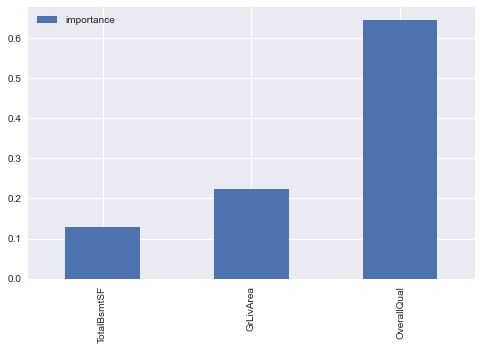

In [30]:
train_results['rf'], test_results['rf'] = fit_model(X_train_rf, y_train, X_test_rf, y_test)
num_features['rf'] = X_train_rf.shape[1]

Нарисуем все результаты на одном графике

[Text(0, 0, 'tree'),
 Text(1, 0, 'variance'),
 Text(2, 0, 'f_score'),
 Text(3, 0, 'rfe'),
 Text(4, 0, 'rfe_tree'),
 Text(5, 0, 'lasso'),
 Text(6, 0, 'rf')]

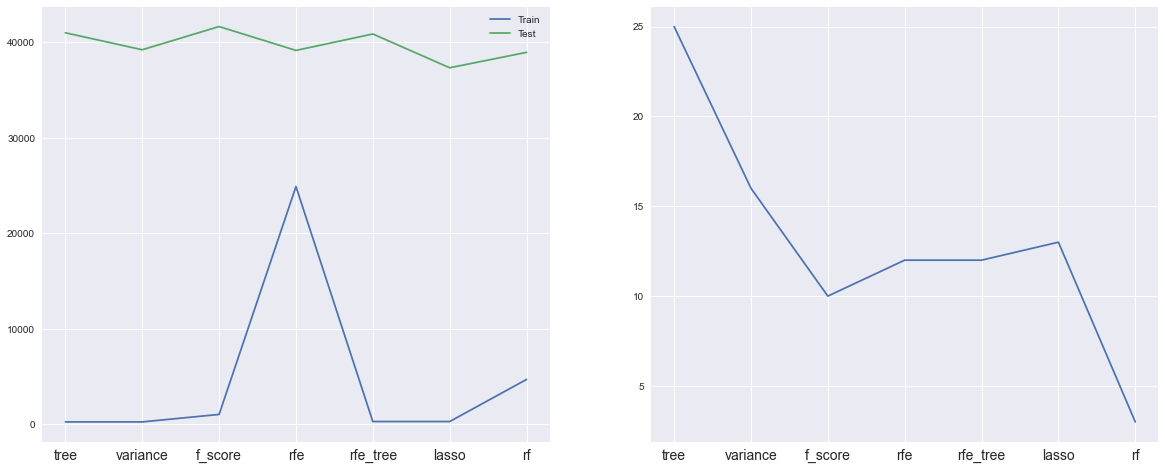

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].plot(train_results.values(), label='Train')
ax[0].plot(test_results.values(), label='Test')
ax[0].set_xticks(range(len(test_results)))
ax[0].set_xticklabels(labels=test_results.keys(), fontsize=14)
ax[0].legend();

ax[1].plot(num_features.values())
ax[1].set_xticks(range(len(test_results)))
ax[1].set_xticklabels(labels=test_results.keys(), fontsize=14)

## Метод главных компонент (Principal Component Analysis, PCA)

Выделение новых признаков путем их отбора часто дает плохие результаты, и
в некоторых ситуациях такой подход практически бесполезен. Например, если
мы работаем с изображениями, у которых признаками являются яркости пикселей,
невозможно выбрать небольшой поднабор пикселей, который дает хорошую информацию о
содержимом картинки. 

Поэтому признаки нужно как-то комбинировать. Рассмотрим метод главных компонент.

Этот метод делает два важных упрощения задачи:

1. Игнорируется целевая переменная
2. Строится линейная комбинация признаков

П. 1 на первый взгляд кажется довольно странным, но на практике обычно не является
таким уж плохим. Это связано с тем, что часто данные устроены так, что имеют какую-то
внутреннюю структуру в пространстве меньшей размерности, которая никак не связана с
целевой переменной. Поэтому и оптимальные признаки можно строить, не глядя на ответ.

П. 2 тоже сильно упрощает задачу, но далее мы научимся избавляться от него.

### Теория

Кратко вспомним, что делает этот метод (подробно см. в лекции).

Обозначим $X$ &mdash; матрица объекты-признаки, с нулевым средним каждого признака,
а $w$ &mdash; некоторый единичный вектор. Тогда
$Xw$ задает величину проекций всех объектов на этот вектор. Далее ищется вектор,
который дает наибольшую дисперсию полученных проекций (то есть наибольшую дисперсию
вдоль этого направления):

$$
    \max_{w: \|w\|=1} \| Xw \|^2 =  \max_{w: \|w\|=1} w^T X^T X w
$$

Подходящий вектор тогда равен собственному вектору матрицы $X^T X$ с наибольшим собственным
значением. После этого все пространство проецируется на ортогональное дополнение к вектору
$w$ и процесс повторяется.

### PCA на плоскости

Для начала посмотрим на метод PCA на плоскости для того, чтобы лучше понять, как он устроен.

Попробуем специально сделать один из признаков более значимым и проверим, что PCA это обнаружит. Сгенерируем выборку из двухмерного гауссовского распределения. Обратите внимание, что выборка изначально выбирается центрированной.

In [32]:
np.random.seed(314512)

data_synth_1 = np.random.multivariate_normal(
    mean=[0, 0], 
    cov=[[4, 0], 
         [0, 1]],
    size=1000)

Теперь изобразим точки выборки на плоскости и применим к ним PCA для нахождения главных компонент.
В результате работы PCA из sklearn в `dec.components_` будут лежать главные направления (нормированные), а в `dec.explained_variance_` &mdash; дисперсия, которую объясняет каждая компонента. Изобразим на нашем графике эти направления, умножив их на дисперсию для наглядного отображения их
значимости.

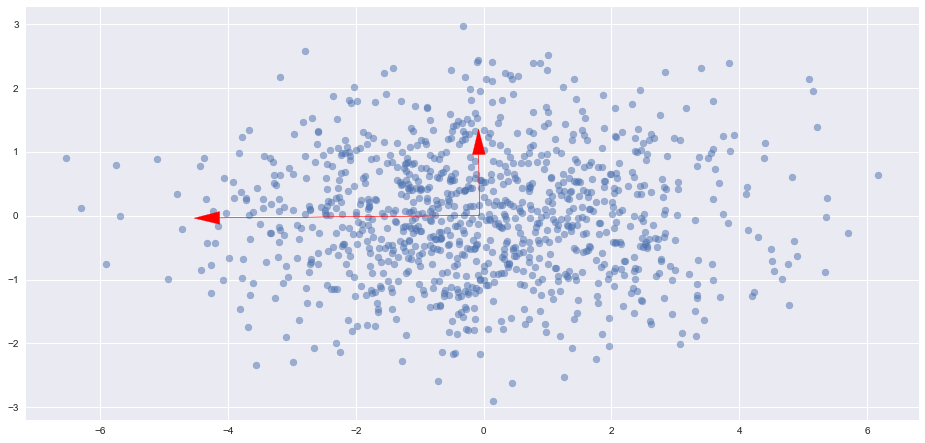

In [33]:
from sklearn.decomposition import PCA


def PCA_show(dataset):
    plt.scatter(*zip(*dataset), alpha=0.5)
    
    dec = PCA()
    dec.fit(dataset) # обучаем PCA
    ax = plt.gca()
    for comp_ind in range(dec.components_.shape[0]): # пробегаемся по выделенным компонентам (осям)
        component = dec.components_[comp_ind, :] # компонента
        var = dec.explained_variance_[comp_ind] # объясненная дисперсия
        start, end = dec.mean_, component * var
        ax.arrow(start[0], start[1], end[0], end[1],
                 head_width=0.2, head_length=0.4, fc='r', ec='r')
    
    ax.set_aspect('equal', adjustable='box')

plt.figure(figsize=(16, 8))
PCA_show(data_synth_1)

Видим, что PCA все правильно нашел. Но это, конечно, можно было сделать и просто посчитав дисперсию каждого признака. Повернем наши данные на некоторый фиксированный угол и проверим, что для PCA это ничего не изменит.

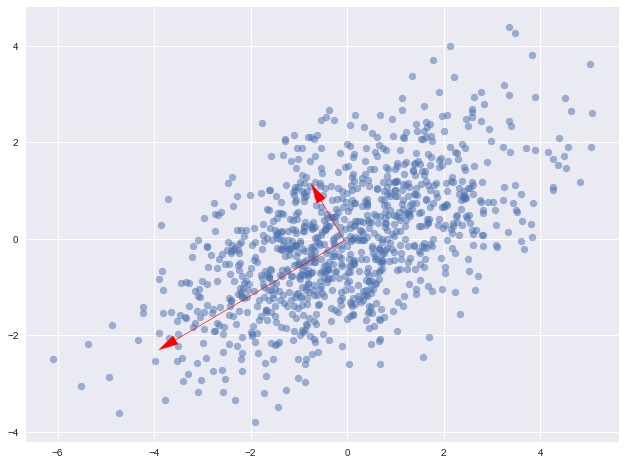

In [34]:
angle = np.pi / 6
rotate = np.array([
        [np.cos(angle), - np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
data_synth_2 = rotate.dot(data_synth_1.T).T

plt.figure(figsize=(16, 8))
PCA_show(data_synth_2)

Ну вот, все нормально. 

Ниже пара примеров, где PCA отработал не так хорошо (в том смысле, что направления задают не очень хорошие признаки).


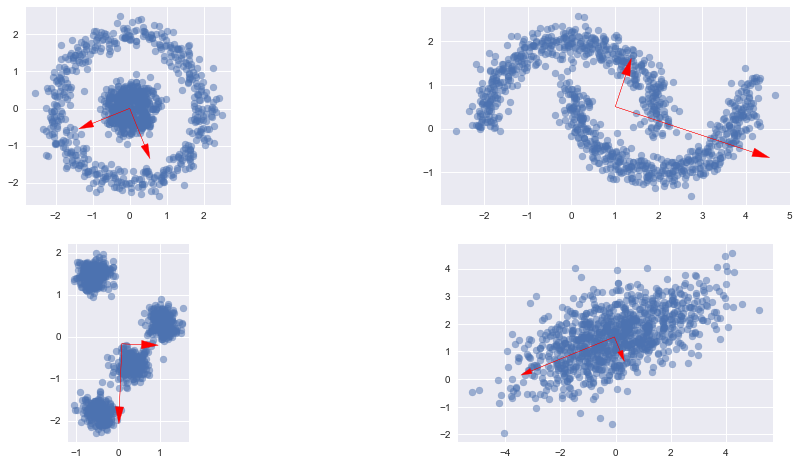

In [35]:
from sklearn.datasets import make_circles, make_moons, make_blobs

np.random.seed(54242)
data_synth_bad = [
    make_circles(n_samples=1000, factor=0.2, noise=0.1)[0]*2,
    make_moons(n_samples=1000, noise=0.1)[0]*2,
    make_blobs(n_samples=1000, n_features=2, centers=4)[0]/5,
    np.random.multivariate_normal(
        mean=[0, 1.5], 
        cov=[[3, 1], 
             [1, 1]],
        size=1000),
]


plt.figure(figsize=(16,8))
rows, cols = 2, 2
for i, data in enumerate(data_synth_bad):
    plt.subplot(rows, cols, i + 1)
    PCA_show(data)

### Лица людей

Рассмотрим датасет с фотографиями лиц людей и применим к его признакам PCA.

Ниже изображены примеры лиц из базы, и последняя картинка &mdash; это "среднее лицо".

In [58]:
faces_images.shape

(400, 4096)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/alexandersolomentsev/scikit_learn_data


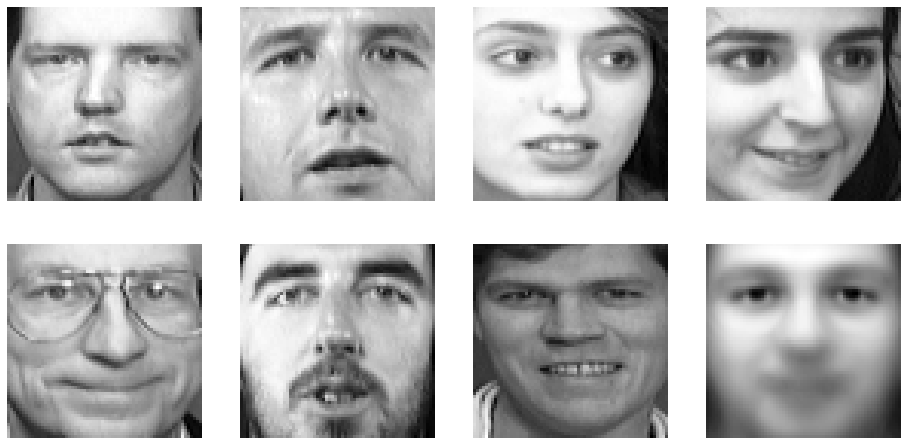

In [36]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=432542)
faces_images = faces.data
faces_ids = faces.target
image_shape = (64, 64)
    
mean_face = faces_images.mean(axis=0)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples - 1):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(faces_images[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())
    
plt.subplot(rows, cols, n_samples)
plt.imshow(mean_face.reshape(image_shape), interpolation='none',
           cmap='gray')
plt.xticks(())
_ = plt.yticks(())

In [61]:
faces_images.shape, red.components_.shape

((400, 4096), (400, 4096))

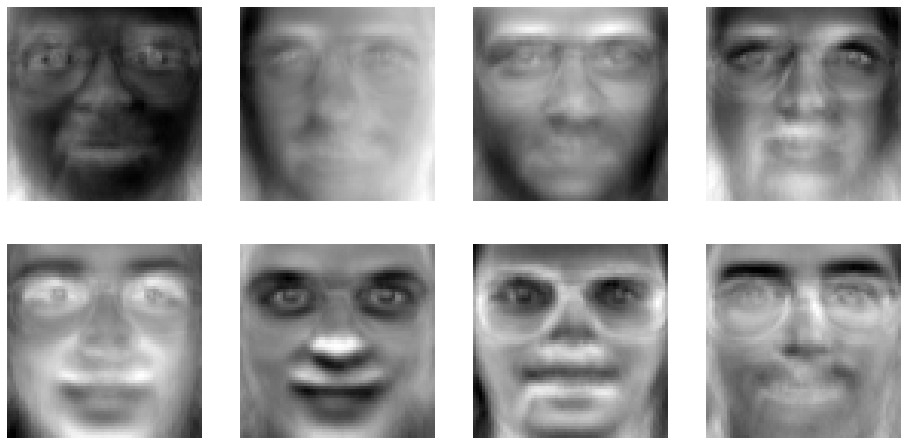

In [37]:
red = PCA()
faces_images -= mean_face
red.fit(faces_images)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(red.components_[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())

Получилось жутковато, что уже неплохо, но есть ли от этого какая-то польза?

Во-первых, новые признаки дают более высокое качество классификации.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gscv_rf = GridSearchCV(RandomForestClassifier(),
                       {'n_estimators': [100, 200, 500, 800], 
                        'max_depth': [2, 3, 4, 5]},
                       cv=3)

In [39]:
%%time

gscv_rf.fit(faces_images, faces_ids)
print(gscv_rf.best_score_)

0.7547600344143942
CPU times: user 1min 27s, sys: 839 ms, total: 1min 28s
Wall time: 1min 34s


In [40]:
%%time

gscv_rf.fit(red.transform(faces_images)[:,:100], faces_ids)
print(gscv_rf.best_score_)

0.8973553286200575
CPU times: user 36.5 s, sys: 507 ms, total: 37 s
Wall time: 38.3 s


Во-вторых, их можно использовать для компактного хранения данных. Для этого объекты трансформируются
в новое пространство, и из него выкидываются самые незначимые признаки.

Ниже приведены результаты сжатия в 10 раз.

4096 400 400
(200, 4096)


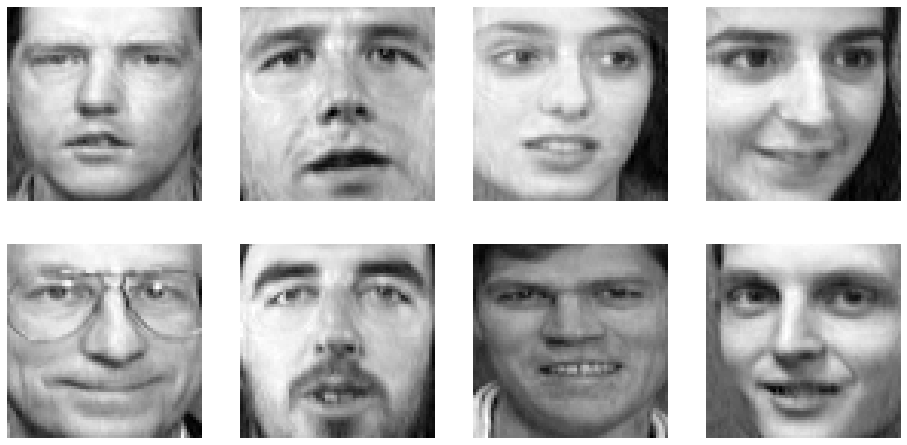

In [64]:
base_size = min(image_shape[0] * image_shape[1], faces_images.shape[0])
print(image_shape[0] * image_shape[1], faces_images.shape[0], base_size)

def compress_and_show(compress_ratio):
    red = PCA(n_components=int(base_size * compress_ratio))
    red.fit(faces_images)
    print(red.components_.shape)

    faces_compressed = red.transform(faces_images) # трансформируем данные с помощью PCA (проецируем точки на выделенные оси)
    faces_restored = red.inverse_transform(faces_compressed) + mean_face # обратное преобразование (восстанавливаем данные)

    plt.figure(figsize=(16, 8))
    rows, cols = 2, 4
    n_samples = rows * cols
    for i in range(n_samples):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(faces_restored[i, :].reshape(image_shape), interpolation='none',
                   cmap='gray')
        plt.xticks(())
        plt.yticks(())
        
compress_and_show(.5)

И даже при сжатии в 2 раза лица остаются узнаваемыми.

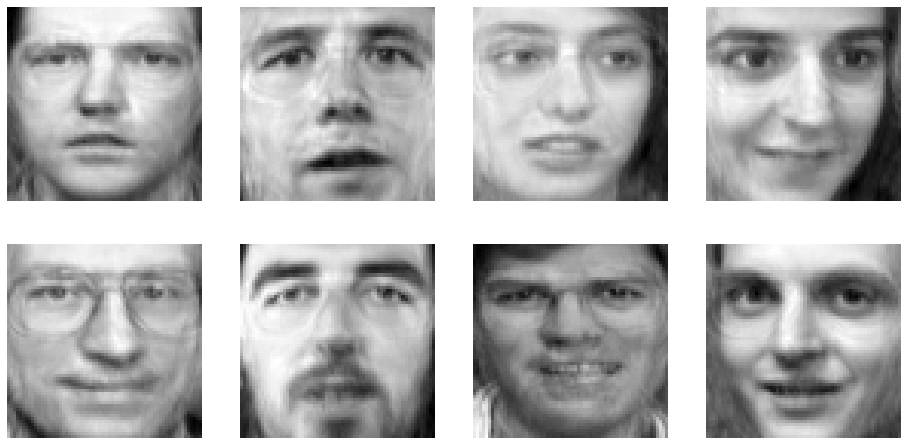

In [42]:
compress_and_show(0.25)

### PCA с ядрами

Так как PCA фактически работает не исходными признаками, а с матрицей их ковариаций, можно использовать для ее вычисления вместо скалярного произведения $\langle x_i, x_j \rangle$ произвольное ядро $K(x_i, x_j)$. Это будет соответствовать переходу в другое пространство, в котором наше предположение о линейности уже будет иметь смысл. Единственная проблема &mdash; непонятно, как подбирать ядро.

Ниже приведены примеры объектов в исходном пространстве (похожие группы обозначены одним цветом для наглядности), и результат их трансформации в новые пространства (для разных ядер). Если результаты получаются линейно разделимыми &mdash; значит мы выбрали подходящее ядро.

In [43]:
??KernelPCA

Object `KernelPCA` not found.


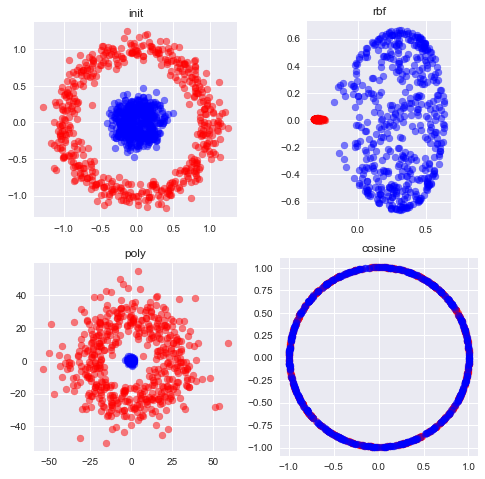

In [44]:
from sklearn.decomposition import KernelPCA


def KPCA_show(X, y):
    reds = y == 0
    blues = y == 1
    
    plt.figure(figsize=(8, 8))
    rows, cols = 2, 2
    plt.subplot(rows, cols, 1)
    plt.title('init')
    plt.scatter(X[reds, 0], X[reds, 1], alpha=0.5, c='r')
    plt.scatter(X[blues, 0], X[blues, 1], alpha=0.5, c='b')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    
    kernels_params = [
        dict(kernel='rbf', gamma=15),
        dict(kernel='poly', gamma=10),
        dict(kernel='cosine', gamma=10),
    ]
    
    for i, p in enumerate(kernels_params):
        dec = KernelPCA(**p)
        X_transformed = dec.fit_transform(X)
        
        plt.subplot(rows, cols, i + 2)
        plt.title(p['kernel'])
        plt.scatter(X_transformed[reds, 0], X_transformed[reds, 1], alpha=0.5, c='r')
        plt.scatter(X_transformed[blues, 0], X_transformed[blues, 1], alpha=0.5, c='b')
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        
np.random.seed(54242)
KPCA_show(*make_circles(n_samples=1000, factor=0.2, noise=0.1))

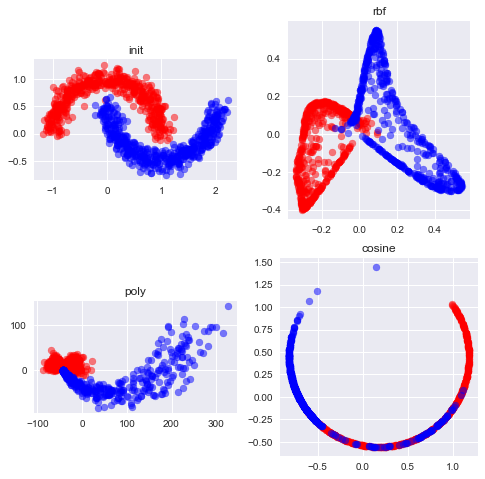

In [45]:
np.random.seed(54242)
KPCA_show(*make_moons(n_samples=1000, noise=0.1))

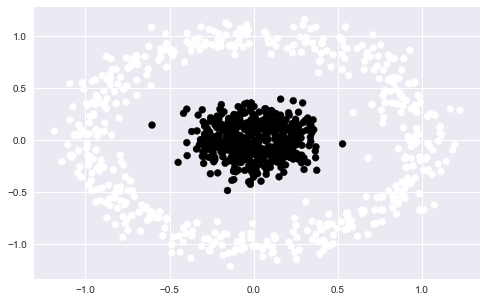

In [46]:
from mpl_toolkits import mplot3d
X, y = make_circles(n_samples=1000, factor=0.2, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y)

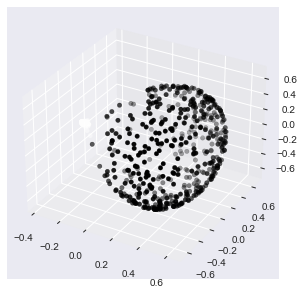

In [47]:
dec = KernelPCA(n_components=3, kernel='rbf', gamma=10)
new_X = dec.fit_transform(X)

ax = plt.axes(projection='3d')

xdata = new_X[:,0]
ydata = new_X[:,1]
zdata = new_X[:,2]

ax.scatter3D(xdata, ydata, zdata, c=y);

In [48]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

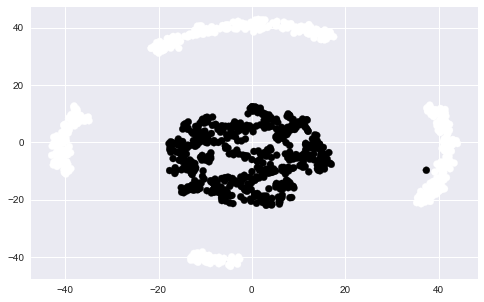

In [49]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)

# Визуализация с помощью t-SNE

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits["data"]
y = digits["target"]

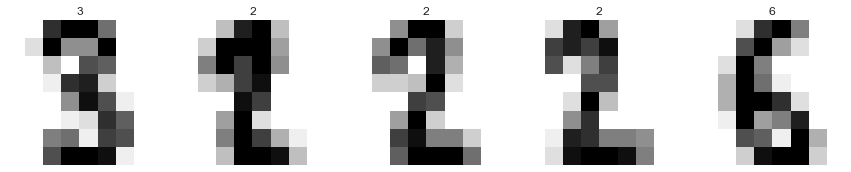

In [51]:
random_idx = np.random.choice(len(X), size=5)
random_digits = X[random_idx, :].reshape(-1, 8, 8)
random_labels = y[random_idx]
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i, d in enumerate(random_digits):
    ax[i].imshow(d, cmap='gray_r')
    ax[i].set_title(random_labels[i])
    ax[i].axis('off')

/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/l3/413_5fb13_gbwljv15vg8kqm0000gn/T/ipykernel_83088/1560087422.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


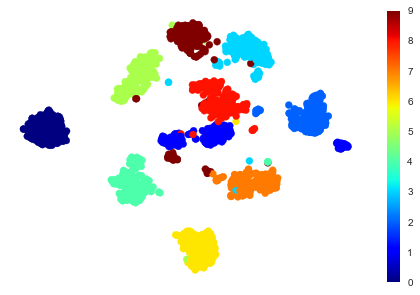

In [52]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

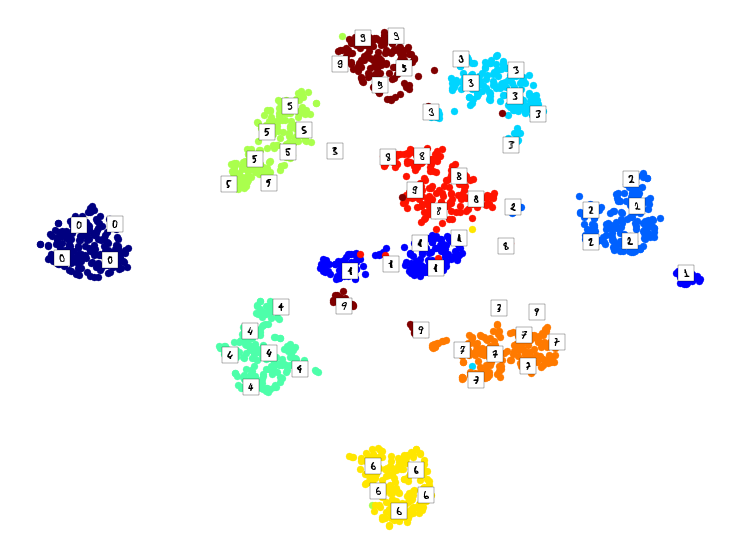

In [53]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(8, 8)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
                
plot_digits(X_reduced, y, images=X)